In [1]:
import warnings
warnings.filterwarnings("default", category=UserWarning)
warnings.filterwarnings("default", category=DeprecationWarning)

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder, StandardScaler

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import HistGradientBoostingClassifier

sns.set_style("whitegrid")


In [2]:
df = pd.read_csv("C:\\Coding\\Machine learning\\CSV Files\\Titanic-Dataset.csv")  # change as needed
print(df.head())
print(df.info())

   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   NaN        S  
<c

In [5]:
target = "Survived"
y = df[target]
X = df.drop(columns=[target])

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

C:\Users\jaidh\AppData\Roaming\Python\Python312\site-packages\IPython\core\pylabtools.py:77: DeprecationWarning: backend2gui is deprecated since IPython 8.24, backends are managed in matplotlib and can be externally registered.
  warnings.warn(


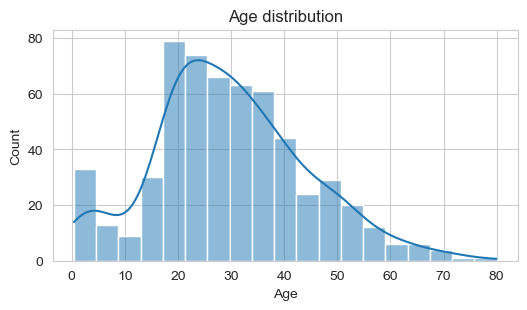

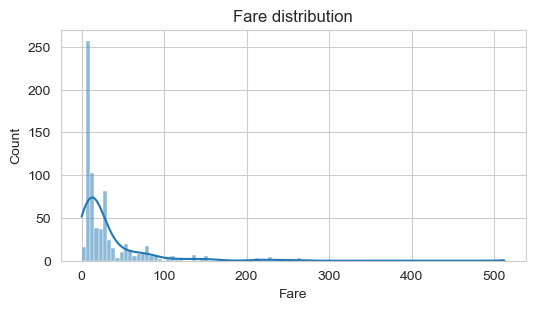

In [9]:
for col in ["Age", "Fare"]:
    if col in X_train.columns:
        plt.figure(figsize=(6, 3))
        sns.histplot(X_train[col], kde=True)
        plt.title(f"{col} distribution")
        plt.show()

In [11]:
numeric_cols = X_train.select_dtypes(include=["number"]).columns.tolist()
categorical_cols = X_train.select_dtypes(include=["object", "category"]).columns.tolist()
numeric_transform = Pipeline(steps=[("imputer", SimpleImputer(strategy="median")),("scaler", StandardScaler())])
categorical_transform = Pipeline(steps=[("imputer", SimpleImputer(strategy="most_frequent")),("onehot", OneHotEncoder(handle_unknown="ignore", sparse_output=False))])
preprocessor = ColumnTransformer(
    transformers=[("num", numeric_transform, numeric_cols),("cat", categorical_transform, categorical_cols)],remainder="drop")

In [13]:
clf_lr = Pipeline([
    ("pre", preprocessor),
    ("model", LogisticRegression(max_iter=2000))])
clf_dt = Pipeline([
    ("pre", preprocessor),
    ("model", DecisionTreeClassifier())])
clf_hgb = Pipeline([("pre", preprocessor),("model", HistGradientBoostingClassifier())])

In [15]:
clf_lr.fit(X_train, y_train)
clf_dt.fit(X_train, y_train)
clf_hgb.fit(X_train, y_train)

models = {
    "Logistic Regression": clf_lr,
    "Decision Tree": clf_dt,
    "HistGradientBoosting": clf_hgb}
for name, model in models.items():

    print(name)
    y_pred = model.predict(X_test)
    print("Accuracy:", accuracy_score(y_test, y_pred))
    print(classification_report(y_test, y_pred))

Logistic Regression
Accuracy: 0.8268156424581006
              precision    recall  f1-score   support

           0       0.84      0.89      0.86       110
           1       0.81      0.72      0.76        69

    accuracy                           0.83       179
   macro avg       0.82      0.81      0.81       179
weighted avg       0.83      0.83      0.82       179

Decision Tree
Accuracy: 0.776536312849162
              precision    recall  f1-score   support

           0       0.81      0.83      0.82       110
           1       0.72      0.70      0.71        69

    accuracy                           0.78       179
   macro avg       0.76      0.76      0.76       179
weighted avg       0.78      0.78      0.78       179

HistGradientBoosting
Accuracy: 0.7653631284916201
              precision    recall  f1-score   support

           0       0.78      0.85      0.82       110
           1       0.73      0.62      0.67        69

    accuracy                           0.